In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Retrive the dataset using the raw address
url = 'titanic_train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Embarked
# Reviewing the missing values in Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Setting S as Embarked after google research
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

In [12]:
df[df['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [13]:
# Finding how many null values are in each Pclass and Sex group
df.loc[df['Age'].isnull(),:].groupby(['Pclass','Sex']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female            9         9     9    0      9      9       9     9   
       male             21        21    21    0     21     21      21    21   
2      female            2         2     2    0      2      2       2     2   
       male              9         9     9    0      9      9       9     9   
3      female           42        42    42    0     42     42      42    42   
       male             94        94    94    0     94     94      94    94   

               Cabin  Embarked  
Pclass Sex                      
1      female      5         9  
       male       11        21  
2      female      1         2  
       male        0         9  
3      female      1        42  
       male        1        94

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

age_corr = corr_matrix['Age'].drop('Age')
age_corr_df = age_corr.reset_index()
age_corr_df.columns = ['Feature', 'Correlation with Age']

print(age_corr_df)

       Feature  Correlation with Age
0  PassengerId              0.036847
1     Survived             -0.077221
2       Pclass             -0.369226
3        SibSp             -0.308247
4        Parch             -0.189119
5         Fare              0.096067


In [15]:
age_by_grp = df.set_index(['Pclass', 'Sex'])
age_by_grp = age_by_grp['Age'].groupby(level=[0,1])

print("Median of Age by Pclass and Gender:")
age_by_grp.median()

Median of Age by Pclass and Gender:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [16]:
# Counting the number of null values in the 'Age' column
missing_values_count = df['Age'].isna().sum()
print(f"Missing values in Age: {missing_values_count}")

# Impute the missing values using the median for each group of Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Verify the imputation
missing_values_count_after = df['Age'].isna().sum()
print(f"Missing values in Age: {missing_values_count_after}")

# Display the DataFrame to check the imputed values
print(df)

Missing values in Age: 177
Missing values in Age: 0
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..               

In [17]:
df['Cabin'].value_counts(dropna=False)

#since lot of missing values lets drop the cabin colum

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
F2               3
              ... 
E36              1
C106             1
A19              1
D7               1
C82              1
Name: count, Length: 148, dtype: int64

In [18]:
df.drop(['Cabin'], axis=1, inplace=True)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
# Reviewing the number of unique values in each feature and the target
indf = df.nunique().to_frame()
indf['type'] = df.dtypes.values
indf

,0,type
PassengerId,891,int64
Survived,2,int64
Pclass,3,int64
Name,891,object
Sex,2,object
Age,89,float64
SibSp,7,int64
Parch,7,int64
Ticket,681,object
Fare,248,float64


In [21]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
df.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
795,2,male,39.0,0,0,13.0000,S,0
421,3,male,21.0,0,0,7.7333,Q,0
177,1,female,50.0,0,0,28.7125,C,0
170,1,male,61.0,0,0,33.5000,S,0
382,3,male,32.0,0,0,7.9250,S,0
473,2,female,23.0,0,0,13.7917,C,1
251,3,female,29.0,1,1,10.4625,S,0
851,3,male,74.0,0,0,7.7750,S,0
69,3,male,26.0,2,0,8.6625,S,0
766,1,male,40.0,0,0,39.6000,C,0


In [22]:
df.shape

(891, 8)

In [23]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

<Axes: >

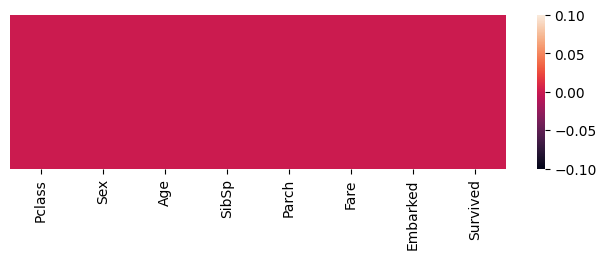

In [24]:
#Heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False)

In [25]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.112424,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.304424,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [26]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Data Visualisation

Survived
0    549
1    342
Name: count, dtype: int64


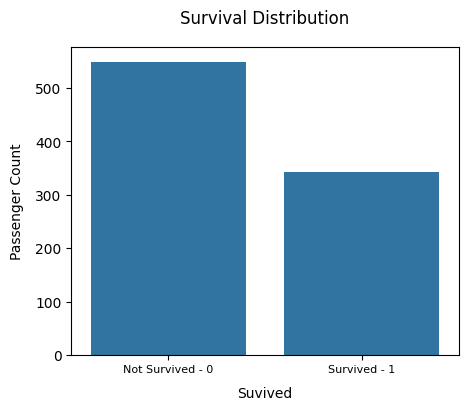

In [27]:
# Visualize the number of survivors in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Survived', data=df)


plt.xlabel('Suvived', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Not Survived - 0', 'Survived - 1'], size=8)
plt.title('Survival Distribution', size=12, y=1.05)

# Summarize the data
print(df['Survived'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


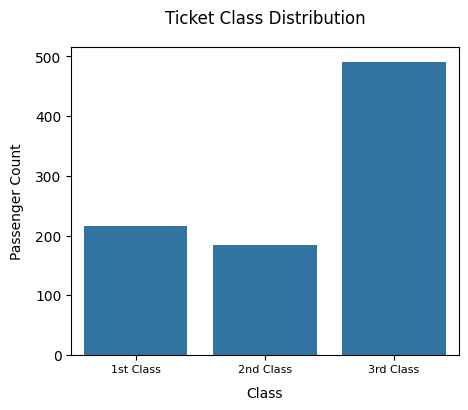

In [28]:
# Visualize the Ticket Class distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Pclass', data=df)


plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Ticket Class Distribution', size=12, y=1.05)

# Summarize the data
print(df['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


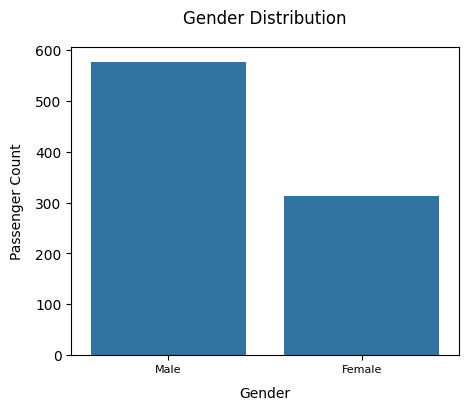

In [29]:
# Visualize the Gender distribution in the dataset
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Sex', data=df)


plt.xlabel('Gender', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1), ['Male', 'Female'], size=8)
plt.title('Gender Distribution', size=12, y=1.05)

# Summarize the data
print(df['Sex'].value_counts())

Text(0.5, 1.05, 'Age Box Plot')

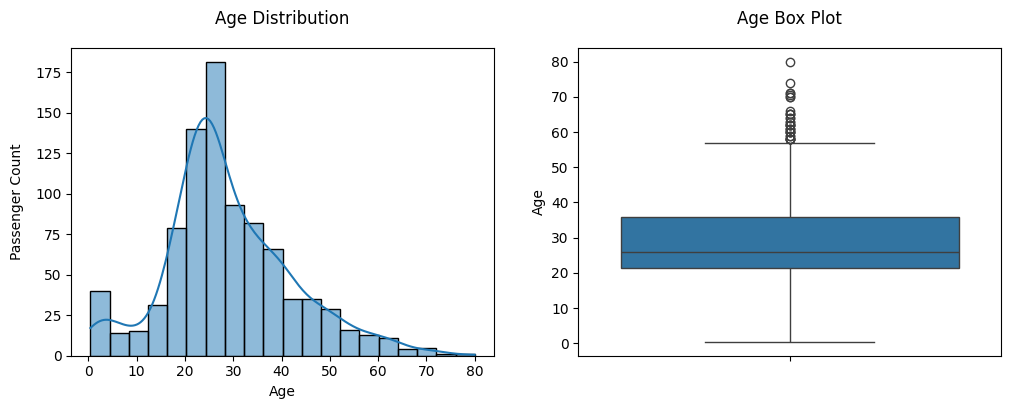

In [30]:
#Visualize Age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Age'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Age'], ax=axes[1])

axes[0].set_title('Age Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Age Box Plot', size=12, y=1.05)

In [31]:
# Summarize the data
print(df['Age'].describe())

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


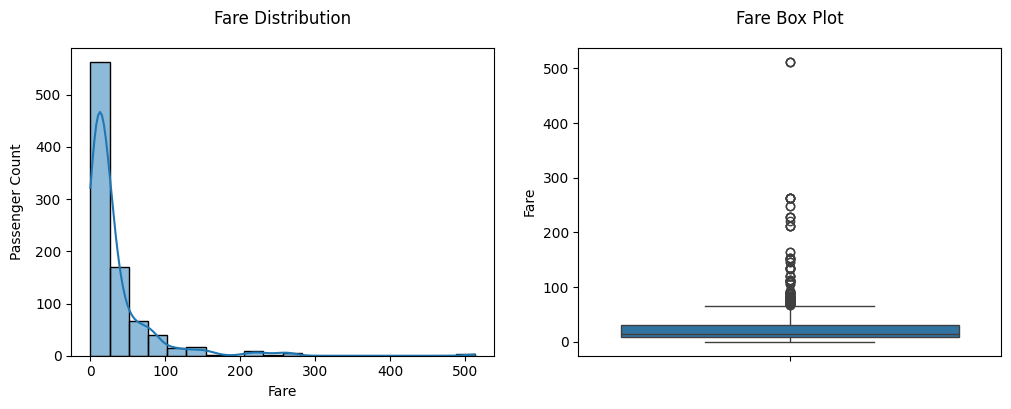

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [32]:
# Visualize Fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Fare'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Fare'], ax=axes[1])

axes[0].set_title('Fare Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Fare Box Plot', size=12, y=1.05)

plt.show()

# Summarize the data
print(df['Fare'].describe())

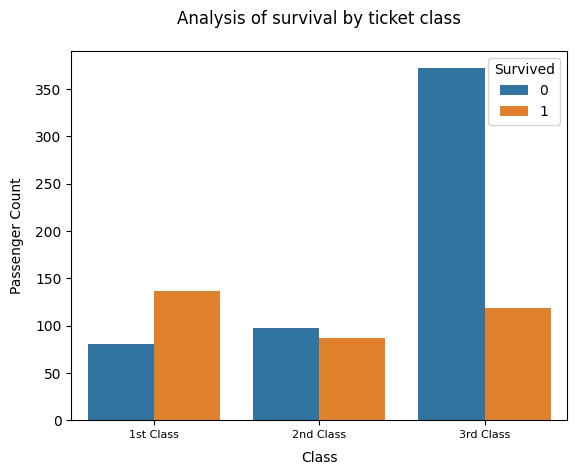

In [33]:
# Comparing Pclass on the basis of Survival
ax = sns.countplot(x = "Pclass", hue = "Survived", data = df)

plt.xlabel('Class', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['1st Class', '2nd Class', '3rd Class'], size=8)
plt.title('Analysis of survival by ticket class', size=12, y=1.05)

plt.show()

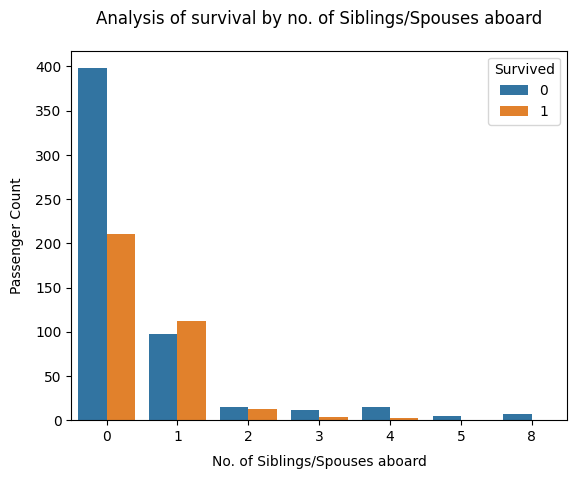

In [34]:
# Comparing SibSp on the basis of Survival
ax = sns.countplot(x = "SibSp", hue = "Survived", data = df)

plt.xlabel('No. of Siblings/Spouses aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Analysis of survival by no. of Siblings/Spouses aboard', size=12, y=1.05)

plt.show()

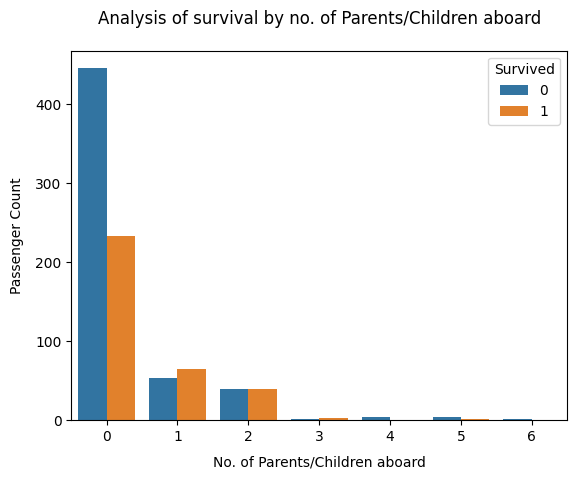

In [35]:
# Comparing SibSp on the basis of Survival
ax = sns.countplot(x = "Parch", hue = "Survived", data = df)

plt.xlabel('No. of Parents/Children aboard', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.title('Analysis of survival by no. of Parents/Children aboard', size=12, y=1.05)

plt.show()

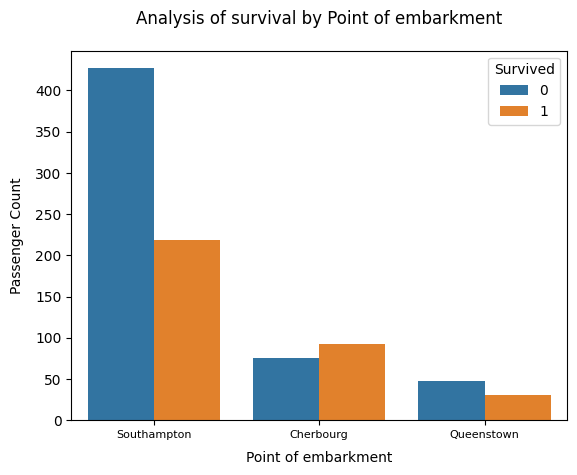

In [36]:
# Comparing Pclass on the basis of Survival
ax = sns.countplot(x = "Embarked", hue = "Survived", data = df)

plt.xlabel('Point of embarkment', size=10, labelpad=8)
plt.ylabel('Passenger Count', size=10, labelpad=8)
plt.xticks((0, 1, 2), ['Southampton', 'Cherbourg', 'Queenstown'], size=8)
plt.title('Analysis of survival by Point of embarkment', size=12, y=1.05)

plt.show()

In [37]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

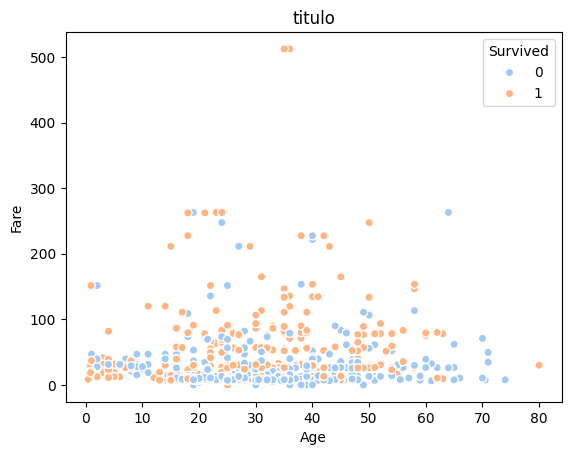

In [38]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, linewidth=1, palette='pastel')
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("titulo")
plt.show()

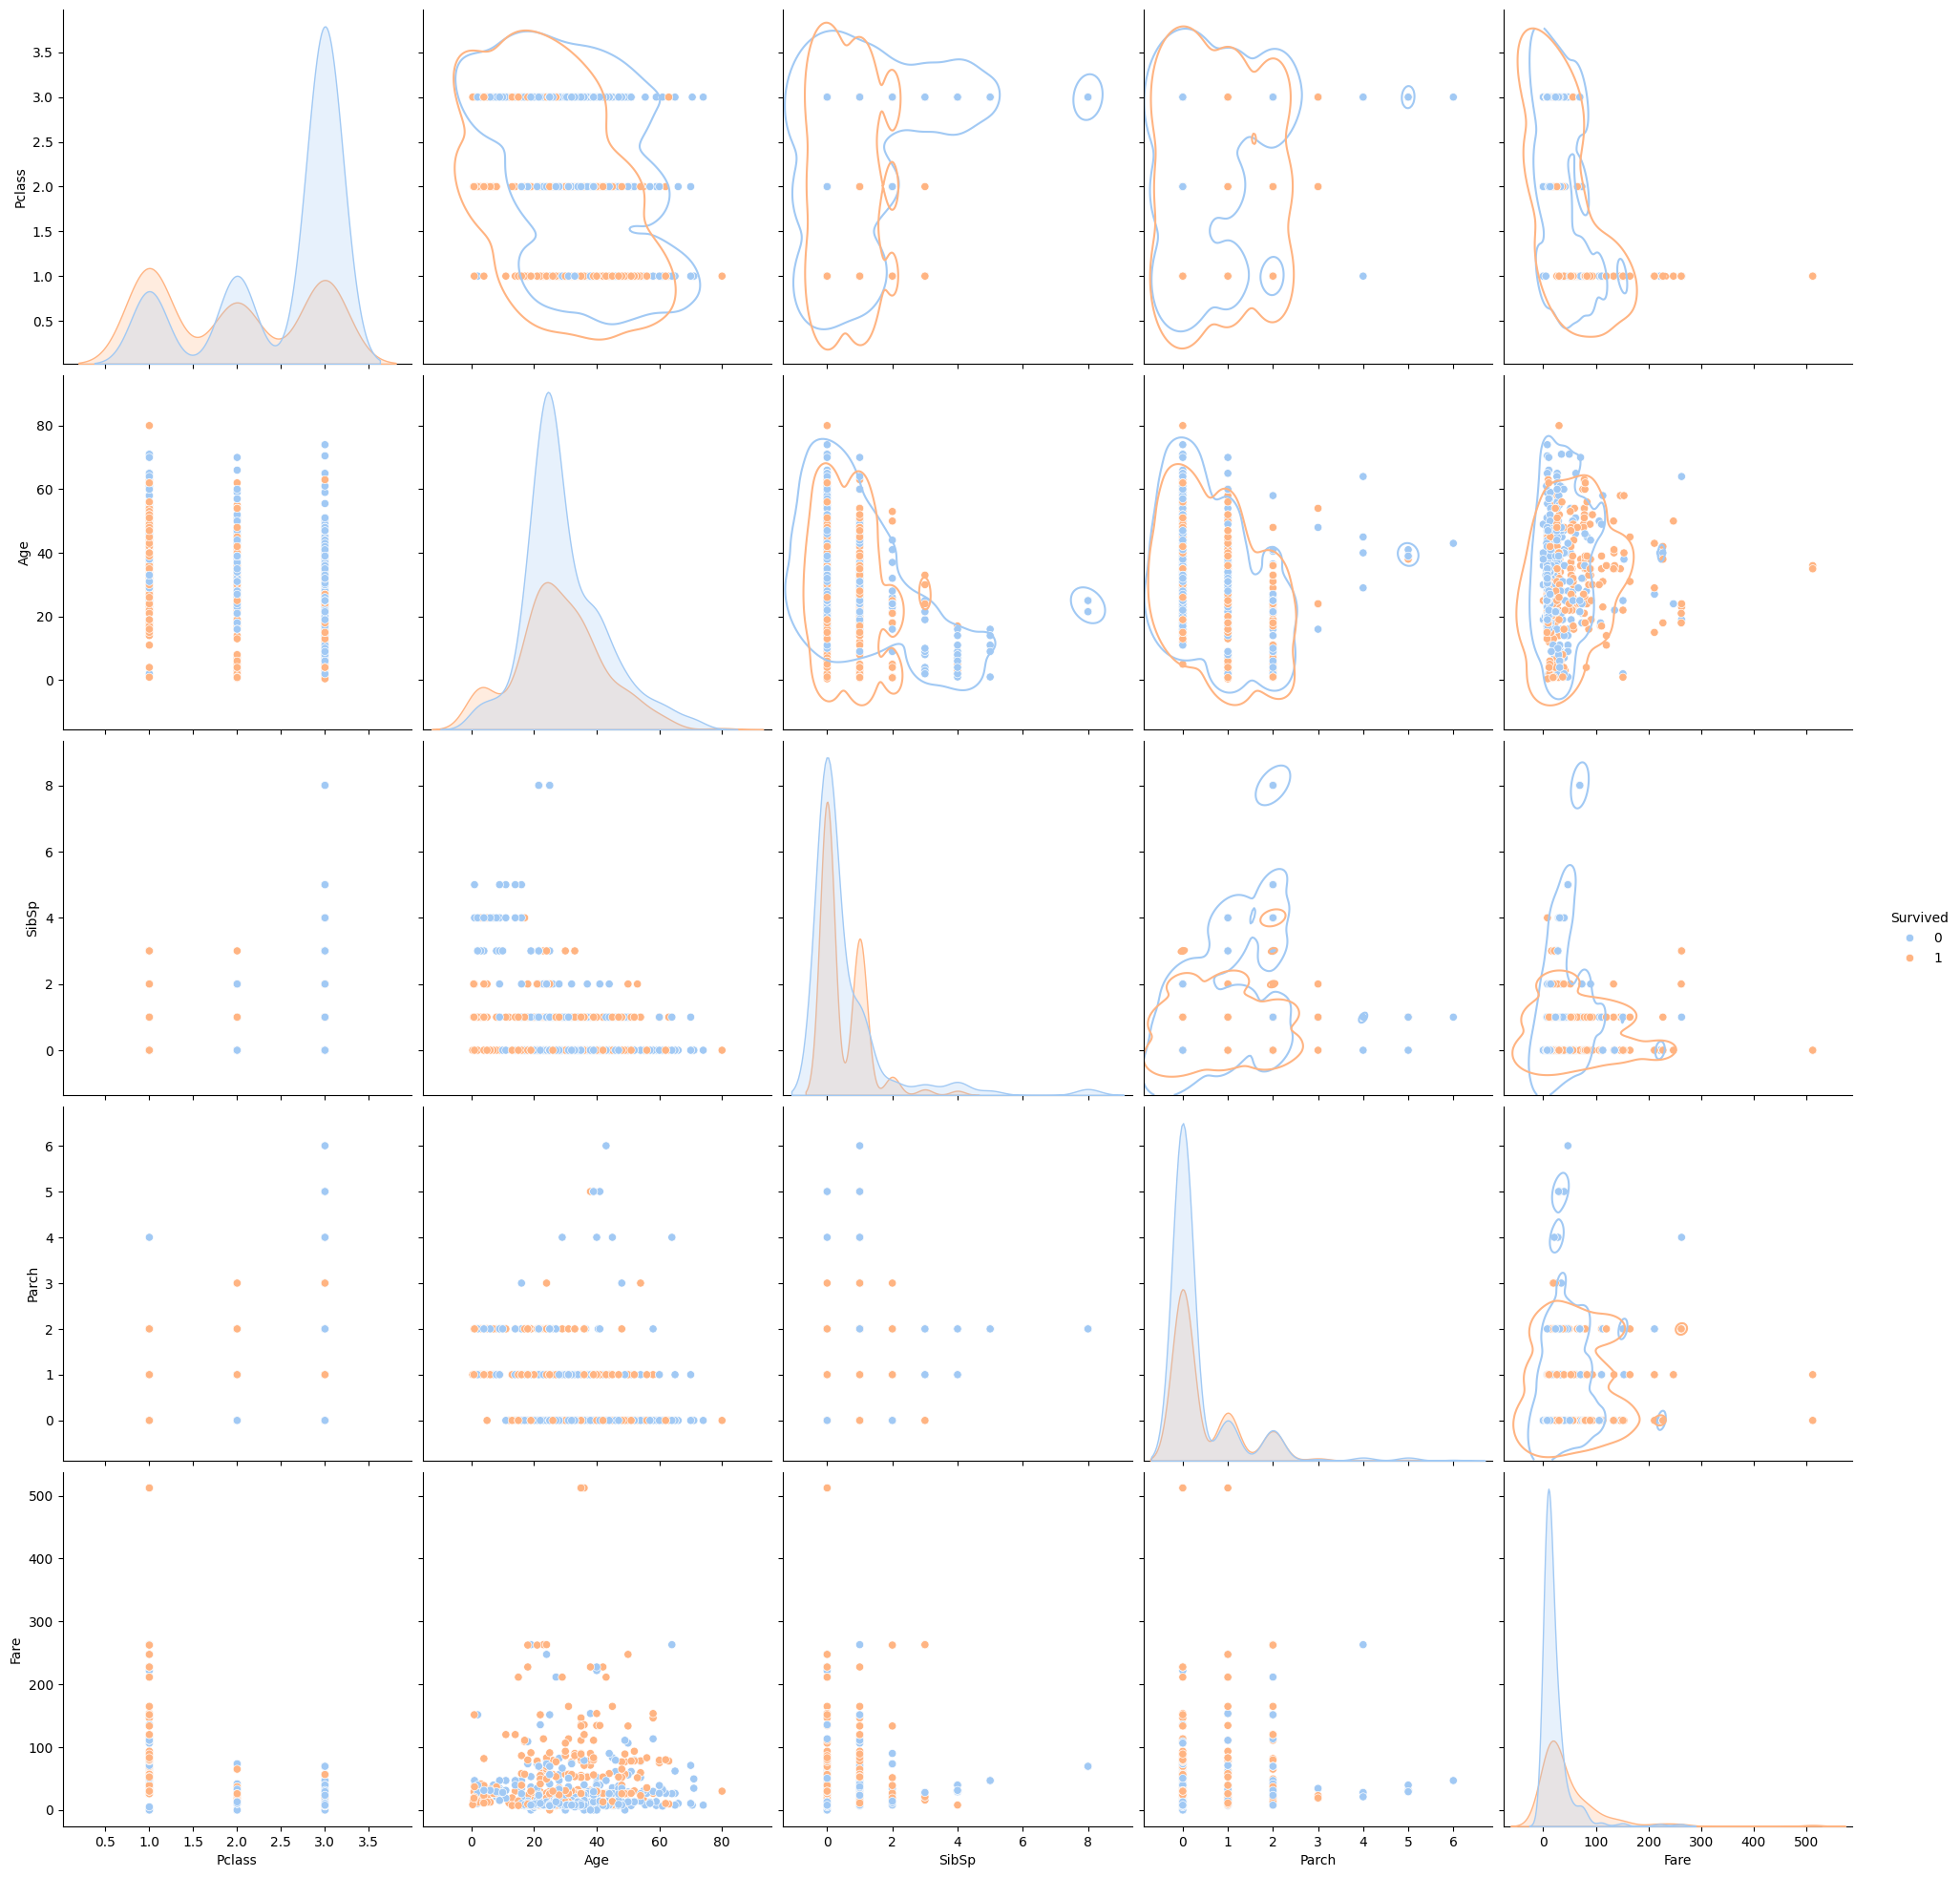

In [39]:
#relationship between all the features
g = sns.pairplot(df, hue="Survived", palette='pastel', size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")

plt.show()

In [40]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [41]:
df = pd.DataFrame(data=df)

# Copy the DataFrame
df_encod = df.copy()

# One-Hot Encoding - columns 'Sex' and 'Embarked'
df_encod = pd.get_dummies(df_encod, columns=['Sex', 'Embarked'])

# Convert True/False to 0/1
df_encod = df_encod.astype(int)

# Display the encoded DataFrame
print(df_encod)

     Pclass  Age  SibSp  Parch  Fare  Survived  Sex_female  Sex_male  \
0         3   22      1      0     7         0           0         1   
1         1   38      1      0    71         1           1         0   
2         3   26      0      0     7         1           1         0   
3         1   35      1      0    53         1           1         0   
4         3   35      0      0     8         0           0         1   
..      ...  ...    ...    ...   ...       ...         ...       ...   
886       2   27      0      0    13         0           0         1   
887       1   19      0      0    30         1           1         0   
888       3   21      1      2    23         0           1         0   
889       1   26      0      0    30         1           0         1   
890       3   32      0      0     7         0           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2        

In [42]:
df_encod

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,0,1,0,0,1
1,1,38,1,0,71,1,1,0,1,0,0
2,3,26,0,0,7,1,1,0,0,0,1
3,1,35,1,0,53,1,1,0,0,0,1
4,3,35,0,0,8,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,1,0,0,1
887,1,19,0,0,30,1,1,0,0,0,1
888,3,21,1,2,23,0,1,0,0,0,1
889,1,26,0,0,30,1,0,1,1,0,0


In [43]:
# Arrange columns in the desired order
columns_order = ['Age', 'Fare', 'Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']
df_encoded = df_encod[columns_order]

# Display the DataFrame
print("DataFrame after arranging columns:")
print(df_encoded.head())

DataFrame after arranging columns:
   Age  Fare  Pclass  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0   22     7       3           0         1           0           0   
1   38    71       1           1         0           1           0   
2   26     7       3           1         0           0           0   
3   35    53       1           1         0           0           0   
4   35     8       3           0         1           0           0   

   Embarked_S  Survived  
0           1         0  
1           0         1  
2           1         1  
3           1         1  
4           1         0  


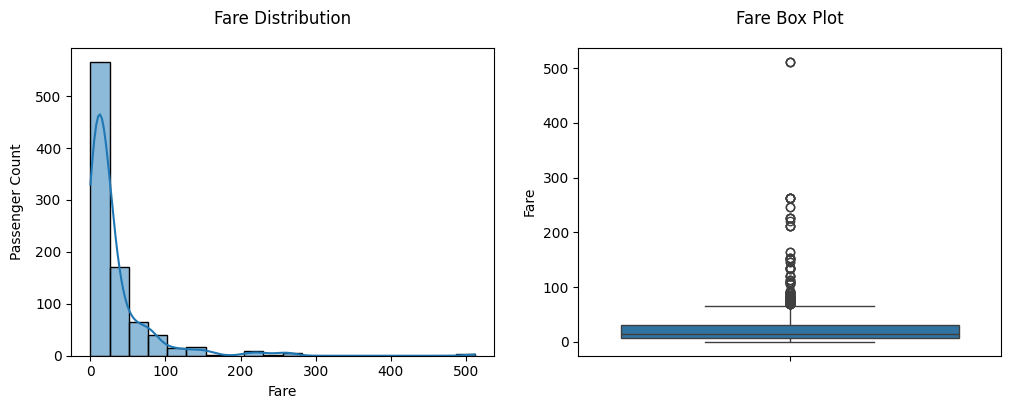

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [44]:
# Visualize Fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_encoded['Fare'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df_encoded['Fare'], ax=axes[1])

axes[0].set_title('Fare Distribution', size=12, y=1.05)
axes[0].set_ylabel('Passenger Count', size=10, labelpad=8)

axes[1].set_title('Fare Box Plot', size=12, y=1.05)

plt.show()

# Summarize the data
print(df['Fare'].describe())

In [45]:
df_encod.skew()

Pclass       -0.630548
Age           0.529842
SibSp         3.695352
Parch         2.749117
Fare          4.786430
Survived      0.478523
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [46]:
df_encod['Fare'] = np.cbrt(df_encod['Fare'])

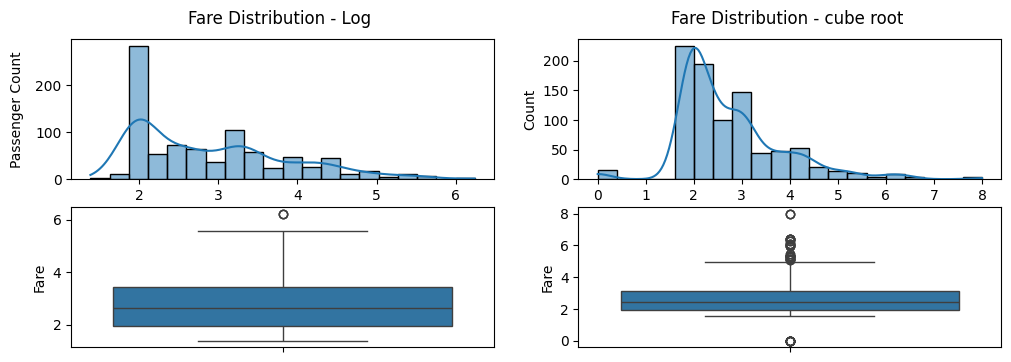

In [47]:
# Removing skewness
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

sns.histplot(np.log(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,0])
sns.boxplot(np.log(df_encoded['Fare']), ax=axes[1,0])

sns.histplot(np.cbrt(df_encoded['Fare']), kde=True , bins=20, ax=axes[0,1])
sns.boxplot(np.cbrt(df_encoded['Fare']), ax=axes[1,1])

axes[0,0].set_title('Fare Distribution - Log ', size=12, y=1.05)
axes[0,1].set_title('Fare Distribution - cube root ', size=12, y=1.05)

axes[0,0].set_ylabel('Passenger Count', size=10, labelpad=8)

plt.show()

In [48]:
df_encod.skew()

Pclass       -0.630548
Age           0.529842
SibSp         3.695352
Parch         2.749117
Fare          1.224234
Survived      0.478523
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [49]:
from scipy.stats import zscore

z = np.abs(zscore(df_encod))
z

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,0.531048,0.432793,0.473674,0.764364,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
1,1.566107,0.670256,0.432793,0.473674,1.292689,1.266990,1.355574,1.355574,2.074505,0.307562,1.623803
2,0.827377,0.230722,0.474545,0.473674,0.764364,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
3,1.566107,0.445012,0.432793,0.473674,0.937643,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
4,0.827377,0.445012,0.474545,0.473674,0.683972,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
886,0.369365,0.155640,0.474545,0.473674,0.359577,0.789272,0.737695,0.737695,0.482043,0.307562,0.615838
887,1.566107,0.756292,0.474545,0.473674,0.338359,1.266990,1.355574,1.355574,0.482043,0.307562,0.615838
888,0.827377,0.606129,0.432793,2.008933,0.095188,0.789272,1.355574,1.355574,0.482043,0.307562,0.615838
889,1.566107,0.230722,0.474545,0.473674,0.338359,1.266990,0.737695,0.737695,2.074505,0.307562,1.623803


In [50]:
df_new = df_encod[(z<3).all(axis=1)]

print(f"{df_encod.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_encod.shape[0] - df_new.shape[0]) / df_encod.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_encod.shape[1]} columns.")
df_process = df_new
df_process

138 rows with outliers were deleted.
This represent 15.49% of the data.
In the new dataset there are 753 rows and 11 columns.


,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,1.912931,0,0,1,0,0,1
1,1,38,1,0,4.140818,1,1,0,1,0,0
2,3,26,0,0,1.912931,1,1,0,0,0,1
3,1,35,1,0,3.756286,1,1,0,0,0,1
4,3,35,0,0,2.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,3,25,0,0,1.912931,0,0,1,0,0,1
886,2,27,0,0,2.351335,0,0,1,0,0,1
887,1,19,0,0,3.107233,1,1,0,0,0,1
888,3,21,1,2,2.843867,0,1,0,0,0,1


In [51]:
print(df_process['Embarked_Q'].value_counts())

# Drop column "Embarked_Q"
df_process.drop('Embarked_Q', axis=1, inplace=True)

Embarked_Q
0    753
Name: count, dtype: int64


In [52]:
#Correlation
# Checking the correlation between features and the target.
cor = df_process.corr()
cor

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_S
Pclass,1.000000,-0.405060,-0.027364,-0.067569,-0.697105,-0.353607,-0.178021,0.178021,-0.177804,0.177804
Age,-0.405060,1.000000,-0.172253,-0.273236,0.170018,-0.062488,-0.087658,0.087658,0.001462,-0.001462
SibSp,-0.027364,-0.172253,1.000000,0.306353,0.282626,0.092837,0.221239,-0.221239,0.026229,-0.026229
Parch,-0.067569,-0.273236,0.306353,1.000000,0.306117,0.222293,0.274883,-0.274883,0.046532,-0.046532
Fare,-0.697105,0.170018,0.282626,0.306117,1.000000,0.391102,0.313446,-0.313446,0.231705,-0.231705
Survived,-0.353607,-0.062488,0.092837,0.222293,0.391102,1.000000,0.544892,-0.544892,0.155843,-0.155843
Sex_female,-0.178021,-0.087658,0.221239,0.274883,0.313446,0.544892,1.000000,-1.000000,0.098509,-0.098509
Sex_male,0.178021,0.087658,-0.221239,-0.274883,-0.313446,-0.544892,-1.000000,1.000000,-0.098509,0.098509
Embarked_C,-0.177804,0.001462,0.026229,0.046532,0.231705,0.155843,0.098509,-0.098509,1.000000,-1.000000
Embarked_S,0.177804,-0.001462,-0.026229,-0.046532,-0.231705,-0.155843,-0.098509,0.098509,-1.000000,1.000000


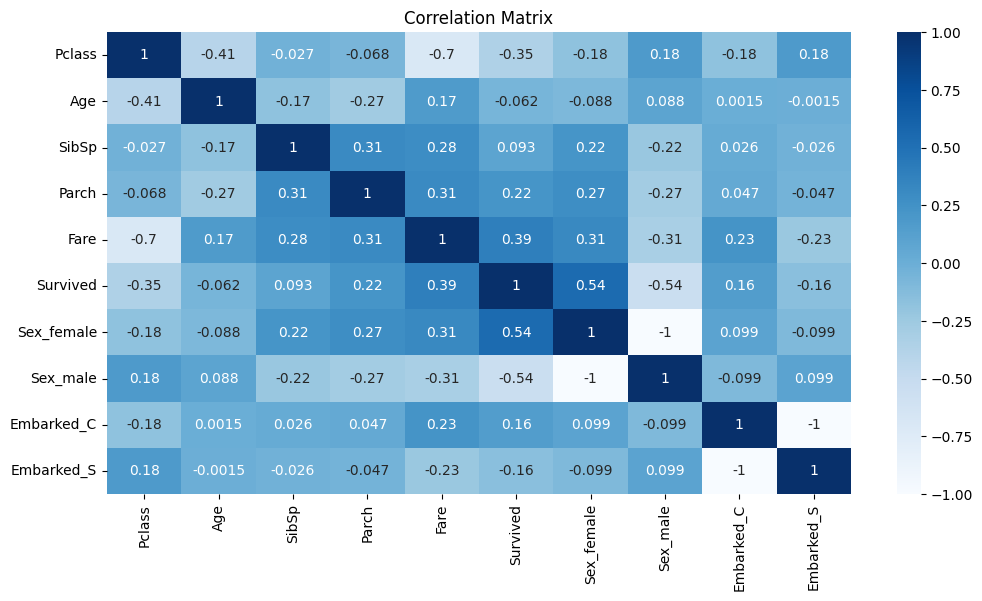

In [53]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [54]:
cor['Survived'].sort_values(ascending = False).to_frame()

,Survived
Survived,1.000000
Sex_female,0.544892
Fare,0.391102
Parch,0.222293
Embarked_C,0.155843
SibSp,0.092837
Age,-0.062488
Embarked_S,-0.155843
Pclass,-0.353607
Sex_male,-0.544892


# Modelling

In [55]:
df_process.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_S
0,3,22,1,0,1.912931,0,0,1,0,1
1,1,38,1,0,4.140818,1,1,0,1,0
2,3,26,0,0,1.912931,1,1,0,0,1
3,1,35,1,0,3.756286,1,1,0,0,1
4,3,35,0,0,2.000000,0,0,1,0,1


In [56]:
x = df_process.drop(['Survived'], axis = 1)
y = df_process['Survived']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_S
0,0.897164,-0.587841,1.027089,-0.475106,-0.783402,-0.702885,0.702885,-0.507046,0.507046
1,-1.489989,0.664778,1.027089,-0.475106,1.485954,1.422707,-1.422707,1.972210,-1.972210
2,0.897164,-0.274686,-0.570841,-0.475106,-0.783402,1.422707,-1.422707,-0.507046,0.507046
3,-1.489989,0.429912,1.027089,-0.475106,1.094265,1.422707,-1.422707,-0.507046,0.507046
4,0.897164,0.429912,-0.570841,-0.475106,-0.694712,-0.702885,0.702885,-0.507046,0.507046
...,...,...,...,...,...,...,...,...,...
748,0.897164,-0.352975,-0.570841,-0.475106,-0.783402,-0.702885,0.702885,-0.507046,0.507046
749,-0.296413,-0.196397,-0.570841,-0.475106,-0.336838,-0.702885,0.702885,-0.507046,0.507046
750,-1.489989,-0.822707,-0.570841,-0.475106,0.433130,1.422707,-1.422707,-0.507046,0.507046
751,0.897164,-0.666130,1.027089,2.948382,0.164863,1.422707,-1.422707,-0.507046,0.507046


In [58]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
8,Embarked_S,inf
6,Sex_male,inf
7,Embarked_C,inf
5,Sex_female,inf
4,Fare,2.559450
0,Pclass,2.411030
1,Age,1.374139
3,Parch,1.326472
2,SibSp,1.229591


In [59]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

Distribution of target variable: Survived (After oversampling)
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64


<Axes: xlabel='Survived'>

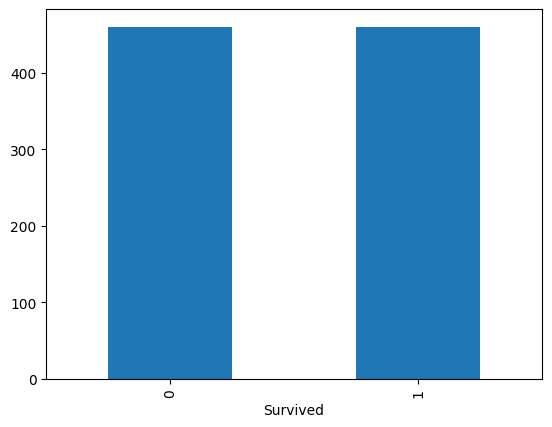

In [60]:
print("Distribution of target variable: Survived (After oversampling)")
print(y1.value_counts(normalize=True))
y1.value_counts().plot(kind='bar')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i

    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, x1, y1)
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.8623 at random_state 176


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (644, 9)
x_test shape:   (276, 9)
y_train shape:  (644,)
y_test shape:   (276,)


In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [64]:
# Functions
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)

    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")

    return [acc, acc_train, y_pred]

In [65]:
models = {'RandomForestClassifier' : RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}


In [66]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[118  15]
 [ 25 118]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       133
           1       0.89      0.83      0.86       143

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Training Accuracy using RandomForestClassifier is 97.05%
The accuracy score using RandomForestClassifier is 85.51%


In [67]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[113  20]
 [ 37 106]]
Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       133
           1       0.84      0.74      0.79       143

    accuracy                           0.79       276
   macro avg       0.80      0.80      0.79       276
weighted avg       0.80      0.79      0.79       276

Training Accuracy using LogisticRegression is 76.40%
The accuracy score using LogisticRegression is 79.35%


In [68]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}

y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[113  20]
 [ 33 110]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       133
           1       0.85      0.77      0.81       143

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276

Training Accuracy using SVC is 80.75%
The accuracy score using SVC is 80.8%


In [69]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[120  13]
 [ 33 110]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       133
           1       0.89      0.77      0.83       143

    accuracy                           0.83       276
   macro avg       0.84      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276

Training Accuracy using GradientBoostingClassifier is 88.51%
The accuracy score using GradientBoostingClassifier is 83.33%


In [70]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[111  22]
 [ 34 109]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       133
           1       0.83      0.76      0.80       143

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

Training Accuracy using AdaBoostClassifier is 81.68%
The accuracy score using AdaBoostClassifier is 79.71%


In [71]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[119  14]
 [ 28 115]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.89      0.80      0.85       143

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

Training Accuracy using BaggingClassifier is 95.96%
The accuracy score using BaggingClassifier is 84.78%


the best models is using randomforestclassifier which gives accuraccy of 85.87%

# Hyperparameter tuning

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing

# Define the hyperparameter search space with reduced options
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 100],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

# Build the RandomForestClassifier model
model = RandomForestClassifier()

# Perform search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=multiprocessing.cpu_count() - 1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 100],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]})

In [74]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [75]:
best_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [76]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=80, max_features='log2',
                       min_samples_leaf=3, min_samples_split=8)

In [77]:
print(f"Best random state: {random_state}")

Best random state: 176


In [82]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

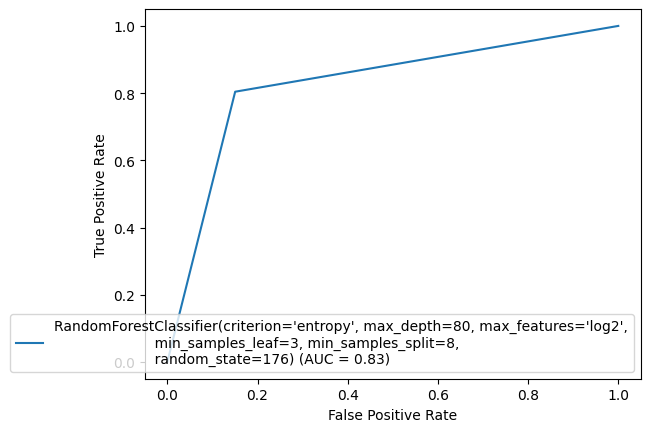

In [86]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = best_model)
display.plot()

In [87]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Titanic_survived_model.pkl")

['Titanic_survived_model.pkl']

In [88]:
# Lets load the saved model and get the predictions
model = joblib.load("Titanic_survived_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {round(accuracy_score(y_test, prediction),4)}")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 0.8261


,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
Predicted,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
Original,1,0,1,1,1,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,1
